## Prediction analysis

In [96]:
import os
from os import listdir
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import scipy.stats as ss
import statsmodels.api as sm
import scipy
import scipy.stats as stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, f1_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
import warnings
from IPython.display import Image 
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.neural_network import MLPRegressor
from sklearn import preprocessing
from sklearn.ensemble import StackingRegressor
from sklearn.preprocessing import RobustScaler
import seaborn as sns
from scipy.stats import norm
from scipy.stats import shapiro
from scipy.optimize import minimize
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
#import missingno as mno

warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 40)

In [97]:
os.getcwd()

'/Users/cristina/Desktop/Finance/ProgettoFinance/Dataset'

In [98]:
dataframe = pd.read_csv('Most-Recent-Cohorts-All-Data-Elements.csv', low_memory=False)

In [99]:
dataframe.head(1)

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,SCH_DEG,HCM2,MAIN,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,ST_FIPS,REGION,LOCALE,LOCALE2,LATITUDE,LONGITUDE,CCBASIC,CCUGPROF,CCSIZSET,HBCU,PBI,ANNHI,TRIBAL,AANAPII,HSI,NANTI,MENONLY,WOMENONLY,RELAFFIL,ADM_RATE,ADM_RATE_ALL,SATVR25,SATVR75,SATMT25,SATMT75,SATWR25,SATWR75,SATVRMID,SATMTMID,SATWRMID,ACTCM25,ACTCM75,ACTEN25,ACTEN75,ACTMT25,ACTMT75,ACTWR25,ACTWR75,ACTCMMID,ACTENMID,ACTMTMID,ACTWRMID,SAT_AVG,SAT_AVG_ALL,PCIP01,PCIP03,PCIP04,PCIP05,PCIP09,PCIP10,PCIP11,PCIP12,PCIP13,PCIP14,PCIP15,PCIP16,PCIP19,PCIP22,PCIP23,PCIP24,PCIP25,PCIP26,PCIP27,PCIP29,PCIP30,PCIP31,PCIP38,PCIP39,PCIP40,PCIP41,PCIP42,PCIP43,PCIP44,PCIP45,PCIP46,PCIP47,PCIP48,PCIP49,PCIP50,PCIP51,PCIP52,PCIP54,CIP01CERT1,CIP01CERT2,CIP01ASSOC,CIP01CERT4,CIP01BACHL,CIP03CERT1,CIP03CERT2,CIP03ASSOC,CIP03CERT4,CIP03BACHL,CIP04CERT1,CIP04CERT2,CIP04ASSOC,CIP04CERT4,CIP04BACHL,CIP05CERT1,CIP05CERT2,CIP05ASSOC,CIP05CERT4,CIP05BACHL,CIP09CERT1,CIP09CERT2,CIP09ASSOC,CIP09CERT4,CIP09BACHL,CIP10CERT1,CIP10CERT2,CIP10ASSOC,CIP10CERT4,CIP10BACHL,CIP11CERT1,CIP11CERT2,CIP11ASSOC,CIP11CERT4,CIP11BACHL,CIP12CERT1,CIP12CERT2,CIP12ASSOC,CIP12CERT4,CIP12BACHL,CIP13CERT1,CIP13CERT2,CIP13ASSOC,CIP13CERT4,CIP13BACHL,CIP14CERT1,CIP14CERT2,CIP14ASSOC,CIP14CERT4,CIP14BACHL,CIP15CERT1,CIP15CERT2,CIP15ASSOC,CIP15CERT4,CIP15BACHL,CIP16CERT1,CIP16CERT2,CIP16ASSOC,CIP16CERT4,CIP16BACHL,CIP19CERT1,CIP19CERT2,CIP19ASSOC,CIP19CERT4,CIP19BACHL,CIP22CERT1,CIP22CERT2,CIP22ASSOC,CIP22CERT4,CIP22BACHL,CIP23CERT1,CIP23CERT2,CIP23ASSOC,CIP23CERT4,CIP23BACHL,CIP24CERT1,CIP24CERT2,CIP24ASSOC,CIP24CERT4,CIP24BACHL,CIP25CERT1,CIP25CERT2,CIP25ASSOC,CIP25CERT4,CIP25BACHL,CIP26CERT1,CIP26CERT2,CIP26ASSOC,CIP26CERT4,CIP26BACHL,CIP27CERT1,CIP27CERT2,CIP27ASSOC,CIP27CERT4,CIP27BACHL,CIP29CERT1,CIP29CERT2,CIP29ASSOC,CIP29CERT4,CIP29BACHL,CIP30CERT1,CIP30CERT2,CIP30ASSOC,CIP30CERT4,CIP30BACHL,CIP31CERT1,CIP31CERT2,CIP31ASSOC,CIP31CERT4,CIP31BACHL,CIP38CERT1,CIP38CERT2,CIP38ASSOC,CIP38CERT4,CIP38BACHL,CIP39CERT1,CIP39CERT2,CIP39ASSOC,CIP39CERT4,CIP39BACHL,CIP40CERT1,CIP40CERT2,CIP40ASSOC,CIP40CERT4,CIP40BACHL,CIP41CERT1,CIP41CERT2,CIP41ASSOC,CIP41CERT4,CIP41BACHL,CIP42CERT1,CIP42CERT2,CIP42ASSOC,CIP42CERT4,CIP42BACHL,CIP43CERT1,CIP43CERT2,CIP43ASSOC,CIP43CERT4,CIP43BACHL,CIP44CERT1,CIP44CERT2,CIP44ASSOC,CIP44CERT4,CIP44BACHL,CIP45CERT1,CIP45CERT2,CIP45ASSOC,CIP45CERT4,CIP45BACHL,CIP46CERT1,CIP46CERT2,CIP46ASSOC,CIP46CERT4,CIP46BACHL,CIP47CERT1,CIP47CERT2,CIP47ASSOC,CIP47CERT4,CIP47BACHL,CIP48CERT1,CIP48CERT2,CIP48ASSOC,CIP48CERT4,CIP48BACHL,CIP49CERT1,CIP49CERT2,CIP49ASSOC,CIP49CERT4,CIP49BACHL,CIP50CERT1,CIP50CERT2,CIP50ASSOC,CIP50CERT4,CIP50BACHL,CIP51CERT1,CIP51CERT2,CIP51ASSOC,CIP51CERT4,CIP51BACHL,CIP52CERT1,CIP52CERT2,CIP52ASSOC,CIP52CERT4,CIP52BACHL,CIP54CERT1,CIP54CERT2,CIP54ASSOC,CIP54CERT4,CIP54BACHL,DISTANCEONLY,UGDS,UG,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,UGDS_WHITENH,UGDS_BLACKNH,UGDS_API,UGDS_AIANOLD,UGDS_HISPOLD,UG_NRA,UG_UNKN,UG_WHITENH,UG_BLACKNH,UG_API,UG_AIANOLD,UG_HISPOLD,PPTUG_EF,PPTUG_EF2,CURROPER,NPT4_PUB,NPT4_PRIV,NPT4_PROG,NPT4_OTHER,NPT41_PUB,NPT42_PUB,NPT43_PUB,NPT44_PUB,NPT45_PUB,NPT41_PRIV,NPT42_PRIV,NPT43_PRIV,NPT44_PRIV,NPT45_PRIV,NPT41_PROG,NPT42_PROG,NPT43_PROG,NPT44_PROG,NPT45_PROG,NPT41_OTHER,NPT42_OTHER,NPT43_OTHER,NPT44_OTHER,NPT45_OTHER,NPT4_048_PUB,NPT4_048_PRIV,NPT4_048_PROG,NPT4_048_OTHER,NPT4_3075_PUB,NPT4_3075_PRIV,NPT4_75UP_PUB,NPT4_75UP_PRIV,NPT4_3075_PROG,NPT4_3075_OTHER,NPT4_75UP_PROG,NPT4_75UP_OTHER,NUM4_PUB,NUM4_PRIV,NUM4_PROG,NUM4_OTHER,NUM41_PUB,NUM42_PUB,NUM43_PUB,NUM44_PUB,NUM45_PUB,NUM41_PRIV,NUM42_PRIV,NUM43_PRIV,NUM44_PRIV,NUM45_PRIV,NUM41_PROG,NUM42_PROG,NUM43_PROG,NUM44_PROG,NUM45_PROG,NUM41_OTHER,NUM42_OTHER,NUM43_OTHER,NUM44_OTHER,NUM45_OTHER,COSTT4_A,COSTT4_P,TUITIONFEE_IN,TUITIONFEE_OUT,TUITIONFEE_PROG,TUITFTE,INEXPFTE,AVGFACSAL,PFTFAC,PCTPELL,C150_4,C150_L4,C150_4_POOLED,C150_L4_POOLED,POOLYRS,PFTFTUG1_EF,D150_4,D150_L4,D150_4_POOLED

## Choose the features that we need for our analysis 

In [100]:
dataframe = dataframe[['CDR3','INSTNM','SAT_AVG','C150_4', 'C150_L4','COMPL_RPY_3YR_RT', 'NONCOM_RPY_3YR_RT',
                       'GRAD_DEBT_MDN', 'PCTFLOAN', 'MD_EARN_WNE_P8','MEDIAN_HH_INC','COUNT_WNE_INC1_P10', 
                       'COUNT_WNE_INC2_P10', 'COUNT_WNE_INC3_P10','ICLEVEL', 'UGDS', 'CONTROL', 'COSTT4_A', 
                       'COSTT4_P', 'HIGHDEG']]  

## Split into train and test sets before the pre-processing

In [101]:
# For the test set, I choose rows with null values in our target variable (CDR3)
df = dataframe[dataframe['CDR3'].notnull()]
test = dataframe[dataframe.CDR3.isnull()]
print(df.shape)
print(test.shape)

(5879, 20)
(927, 20)


## Preprocessing

In [102]:
#Mix rows in the training set
df = df.sample(frac=1, random_state=1)

In [103]:
df.shape

(5879, 20)

In [104]:
df.head(3)

,CDR3,INSTNM,SAT_AVG,C150_4,C150_L4,COMPL_RPY_3YR_RT,NONCOM_RPY_3YR_RT,GRAD_DEBT_MDN,PCTFLOAN,MD_EARN_WNE_P8,MEDIAN_HH_INC,COUNT_WNE_INC1_P10,COUNT_WNE_INC2_P10,COUNT_WNE_INC3_P10,ICLEVEL,UGDS,CONTROL,COSTT4_A,COSTT4_P,HIGHDEG
5836,0.072,California Technical Academy,NaN,NaN,0.8750,PrivacySuppressed,PrivacySuppressed,7568,0.1286,NaN,NaN,NaN,NaN,NaN,3,778.0,3,NaN,22280.0,1
4926,0.254,Florida Academy of Health & Beauty,NaN,NaN,0.8750,PrivacySuppressed,PrivacySuppressed,5500,0.5085,PrivacySuppressed,NaN,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,3,43.0,3,NaN,18048.0,1
1501,0.066,Lowell Academy Hairstyling Institute,NaN,NaN,0.5918,0.4347826087,0.2666666667,7433,0.9024,20600,76078.56,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,3,95.0,3,NaN,18184.0,1


In [105]:
print(df.info(verbose=True))
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5879 entries, 5836 to 5775
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CDR3                5879 non-null   float64
 1   INSTNM              5879 non-null   object 
 2   SAT_AVG             1280 non-null   float64
 3   C150_4              2166 non-null   float64
 4   C150_L4             2713 non-null   float64
 5   COMPL_RPY_3YR_RT    5568 non-null   object 
 6   NONCOM_RPY_3YR_RT   5568 non-null   object 
 7   GRAD_DEBT_MDN       5749 non-null   object 
 8   PCTFLOAN            5157 non-null   float64
 9   MD_EARN_WNE_P8      5009 non-null   object 
 10  MEDIAN_HH_INC       4290 non-null   object 
 11  COUNT_WNE_INC1_P10  5009 non-null   object 
 12  COUNT_WNE_INC2_P10  5009 non-null   object 
 13  COUNT_WNE_INC3_P10  5009 non-null   object 
 14  ICLEVEL             5879 non-null   int64  
 15  UGDS                5171 non-null   float64
 16  CON

In [106]:
#Check missing values
print(df.isnull().sum())

CDR3                     0
INSTNM                   0
SAT_AVG               4599
C150_4                3713
C150_L4               3166
COMPL_RPY_3YR_RT       311
NONCOM_RPY_3YR_RT      311
GRAD_DEBT_MDN          130
PCTFLOAN               722
MD_EARN_WNE_P8         870
MEDIAN_HH_INC         1589
COUNT_WNE_INC1_P10     870
COUNT_WNE_INC2_P10     870
COUNT_WNE_INC3_P10     870
ICLEVEL                  0
UGDS                   708
CONTROL                  0
COSTT4_A              2731
COSTT4_P              4163
HIGHDEG                  0
dtype: int64


Some numeric columns are classified as object because they contained some 'PrivacySuppressed' data and/or null values. The presence of these values hinders the predictive ability of our features. We can either opt for removing the entire rows containing such data or converting these values into NA and then imputing them using different methods. We will opt for the first option in case of 'PrivacySuppressed' data because the might be non-random missing data; while in case of null values, we will impute them later.

In [107]:
#train --> delete rows with 'PrivacySuppressed' data
print(len(df[df['GRAD_DEBT_MDN'] == "PrivacySuppressed"]))
print(len(df[df['COMPL_RPY_3YR_RT'] == "PrivacySuppressed"]))
print(len(df[df['MD_EARN_WNE_P8'] == "PrivacySuppressed"]))
print(len(df[df['COUNT_WNE_INC1_P10'] == "PrivacySuppressed"]))
print(len(df[df['COUNT_WNE_INC2_P10'] == "PrivacySuppressed"]))
print(len(df[df['COUNT_WNE_INC3_P10'] == "PrivacySuppressed"]))
print(len(df[df['MEDIAN_HH_INC'] == "PrivacySuppressed"]))
df = df[(df['GRAD_DEBT_MDN'] != "PrivacySuppressed") ]
df = df[(df['COMPL_RPY_3YR_RT'] != 'PrivacySuppressed')]
df = df[df['MD_EARN_WNE_P8'] != 'PrivacySuppressed']
df = df[df['COUNT_WNE_INC1_P10'] != 'PrivacySuppressed']
df = df[df['COUNT_WNE_INC3_P10'] != 'PrivacySuppressed']
df = df[df['COUNT_WNE_INC2_P10'] != 'PrivacySuppressed']
df = df[df['MEDIAN_HH_INC'] != 'PrivacySuppressed']
print(df.shape)

603
992
498
890
1534
1547
78
(3786, 20)


In [108]:
#test --> delete rows with 'PrivacySuppressed' data
print(len(test[test['GRAD_DEBT_MDN'] == "PrivacySuppressed"]))
print(len(test[test['COMPL_RPY_3YR_RT'] == "PrivacySuppressed"]))
print(len(test[test['MD_EARN_WNE_P8'] == "PrivacySuppressed"]))
print(len(test[test['COUNT_WNE_INC1_P10'] == "PrivacySuppressed"]))
print(len(test[test['COUNT_WNE_INC2_P10'] == "PrivacySuppressed"]))
print(len(test[test['COUNT_WNE_INC3_P10'] == "PrivacySuppressed"]))
print(len(test[test['MEDIAN_HH_INC'] == "PrivacySuppressed"]))
test = test[(test['GRAD_DEBT_MDN'] != "PrivacySuppressed") ]
test = test[(test['COMPL_RPY_3YR_RT'] != 'PrivacySuppressed')]
test = test[test['MD_EARN_WNE_P8'] != 'PrivacySuppressed']
test = test[test['COUNT_WNE_INC1_P10'] != 'PrivacySuppressed']
test = test[test['COUNT_WNE_INC3_P10'] != 'PrivacySuppressed']
test = test[test['COUNT_WNE_INC2_P10'] != 'PrivacySuppressed']
test = test[test['MEDIAN_HH_INC'] != 'PrivacySuppressed']
print(test.shape)

639
48
127
234
467
467
10
(251, 20)


Convert all the columns classified as object into numeric columns (float values)

In [109]:
#train
df['COMPL_RPY_3YR_RT'] = df['COMPL_RPY_3YR_RT'].astype(str).astype(float)
df['NONCOM_RPY_3YR_RT'] = df['NONCOM_RPY_3YR_RT'].astype(str).astype(float)
df['GRAD_DEBT_MDN'] = df['GRAD_DEBT_MDN'].astype(str).astype(float)
df['MD_EARN_WNE_P8'] = df['MD_EARN_WNE_P8'].astype(str).astype(float)
df['COUNT_WNE_INC1_P10'] = df['COUNT_WNE_INC1_P10'].astype(str).astype(float)
df['COUNT_WNE_INC2_P10'] = df['COUNT_WNE_INC2_P10'].astype(str).astype(float)
df['COUNT_WNE_INC3_P10'] = df['COUNT_WNE_INC3_P10'].astype(str).astype(float)
df['MEDIAN_HH_INC'] = df['MEDIAN_HH_INC'].astype(str).astype(float)

In [110]:
#test
test['COMPL_RPY_3YR_RT'] = test['COMPL_RPY_3YR_RT'].astype(str).astype(float)
test['NONCOM_RPY_3YR_RT'] = test['NONCOM_RPY_3YR_RT'].astype(str).astype(float)
test['GRAD_DEBT_MDN'] = test['GRAD_DEBT_MDN'].astype(str).astype(float)
test['MD_EARN_WNE_P8'] = test['MD_EARN_WNE_P8'].astype(str).astype(float)
test['COUNT_WNE_INC1_P10'] = test['COUNT_WNE_INC1_P10'].astype(str).astype(float)
test['COUNT_WNE_INC2_P10'] = test['COUNT_WNE_INC2_P10'].astype(str).astype(float)
test['COUNT_WNE_INC3_P10'] = test['COUNT_WNE_INC3_P10'].astype(str).astype(float)
test['MEDIAN_HH_INC'] = test['MEDIAN_HH_INC'].astype(str).astype(float)

In [111]:
df.describe()

,CDR3,SAT_AVG,C150_4,C150_L4,COMPL_RPY_3YR_RT,NONCOM_RPY_3YR_RT,GRAD_DEBT_MDN,PCTFLOAN,MD_EARN_WNE_P8,MEDIAN_HH_INC,COUNT_WNE_INC1_P10,COUNT_WNE_INC2_P10,COUNT_WNE_INC3_P10,ICLEVEL,UGDS,CONTROL,COSTT4_A,COSTT4_P,HIGHDEG
count,3786.000000,1212.000000,1881.000000,1314.000000,3598.000000,3598.000000,3668.000000,3352.000000,3334.000000,2906.000000,3334.000000,3334.000000,3334.000000,3786.000000,3357.000000,3786.000000,2544.000000,665.000000,3786.000000
mean,0.104838,1139.191419,0.513737,0.497277,0.601202,0.399106,18338.647492,0.518199,35238.602280,60959.016721,1095.669466,987.862028,716.612178,1.516112,3949.364015,1.928685,29316.481525,22881.497744,2.570523
std,0.066453,121.302434,0.204704,0.231314,0.175852,0.167664,7942.603701,0.229910,10931.287475,11339.403497,2633.030373,3321.010119,2046.403210,0.708789,7000.575104,0.812509,16181.685883,5271.718463,1.400667
min,0.000000,785.000000,0.000000,0.000000,0.090517,0.092624,2334.000000,0.000000,15500.000000,17277.840000,26.000000,25.000000,25.000000,1.000000,0.000000,1.000000,6419.000000,8742.000000,0.000000
25%,0.050000,1059.000000,0.369100,0.287500,0.461898,0.252735,10664.000000,0.354875,28000.000000,52801.310000,163.000000,162.000000,81.000000,1.000000,396.000000,1.000000,15661.500000,19084.000000,2.000000
50%,0.097000,1123.500000,0.517800,0.488700,0.609965,0.389831,19500.000000,0.553000,33700.000000,60216.425000,444.000000,331.000000,220.000000,1.000000,1383.000000,2.000000,24918.500000,22223.000000,3.000000
75%,0.147000,1197.250000,0.655600,0.697975,0.743333,0.526176,25000.000000,0.692075,40200.000000,68625.572500,1096.500000,799.000000,567.500000,2.000000,4117.000000,3.000000,39971.500000,26645.000000,4.000000
max,0.595000,1545.000000,1.000000,1.000000,0.970646,0.906863,46212.000000,1.000000,125900.000000,98890.710000,30518.000000,41362.000000,22844.000000,3.000000,88921.000000,3.000000,75735.000000,41275.000000,4.000000


In [112]:
numeric_cols = ['SAT_AVG', 'C150_4', 'C150_L4', 'PCTFLOAN', 'UGDS', 'COSTT4_A', 'COSTT4_P','COMPL_RPY_3YR_RT', 
                'NONCOM_RPY_3YR_RT','GRAD_DEBT_MDN', 'MD_EARN_WNE_P8', 'MEDIAN_HH_INC',
            'COUNT_WNE_INC1_P10', 'COUNT_WNE_INC2_P10', 'COUNT_WNE_INC3_P10'] 
discrete_cols = ['INSTNM','ICLEVEL', 'CONTROL', 'HIGHDEG']

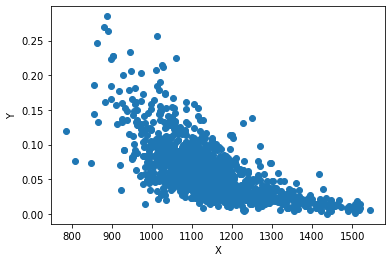

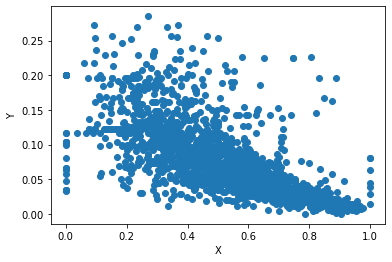

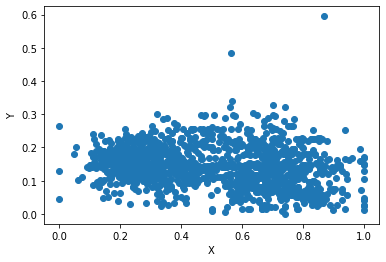

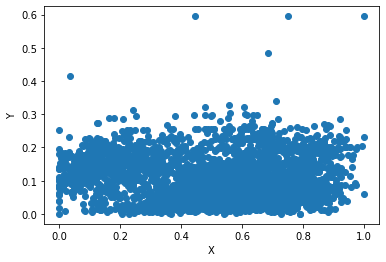

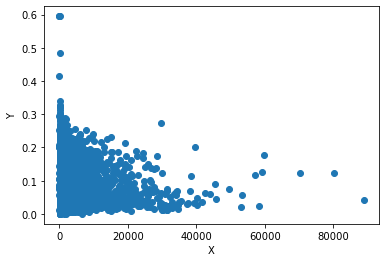

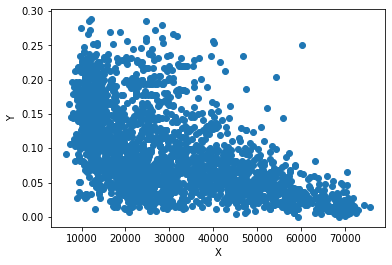

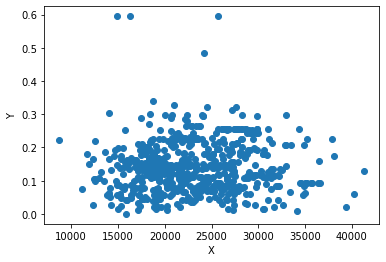

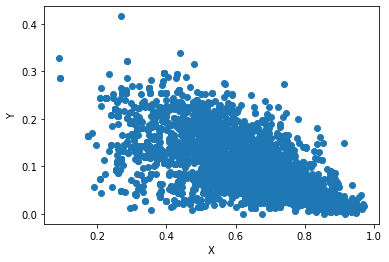

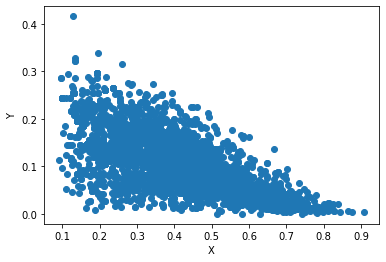

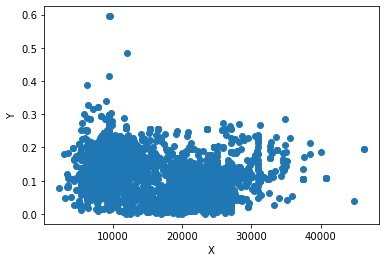

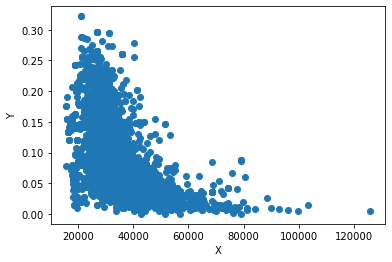

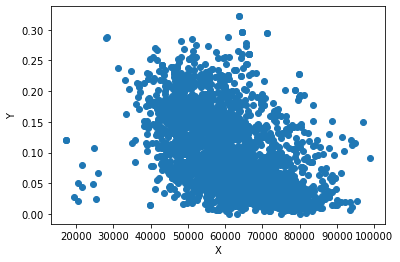

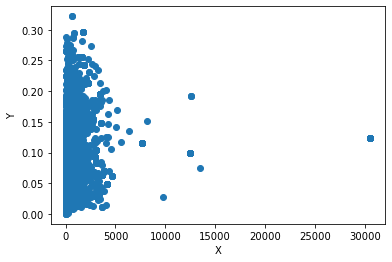

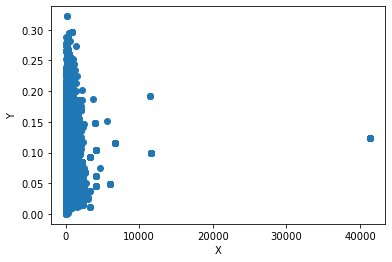

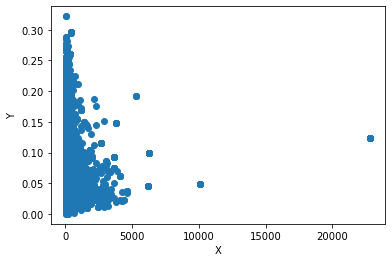

In [113]:
## Scatter plots for numerical variables
for i in df[numeric_cols]:
    plt.scatter(df[i].tolist(), df.CDR3.tolist())
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()
    
## NB: presence of outliers

## COSTT4_A and COSTT4_P

I will operate on COSTA and COSTP. From the data dictionary, COSTT4_A and COSTT4_P are the average costs of attendance for academic-year institutions and program-year institutions respectively. There are too many missing values and as obvious, some of them must be non-random NA values. This is because only the academic-year institutions will have a value for COSTT4_A feature and NULL for the rest and vice-versa. I can go ahead and engineer a common feature representing the cost of attendance irrespective of whether the institute is an academic-year based or program-year.

In [114]:
#train set
df['COSTT4_A'][df['COSTT4_A'].isnull() & df['COSTT4_P'].notnull()] = 0
df['COSTT4_P'][df['COSTT4_P'].isnull() & df['COSTT4_A'].notnull()] = 0
# now create a feature for the cost of attendance
df['COST'] = df['COSTT4_A'] + df['COSTT4_P']
df.drop(["COSTT4_A"], axis=1, inplace=True)
df.drop(["COSTT4_P"], axis=1, inplace=True)

#test set
test['COSTT4_A'][test['COSTT4_A'].isnull() & test['COSTT4_P'].notnull()] = 0
test['COSTT4_P'][test['COSTT4_P'].isnull() & test['COSTT4_A'].notnull()] = 0
# now create a feature for the cost of attendance
test['COST'] = test['COSTT4_A'] + test['COSTT4_P']
test.drop(["COSTT4_A"], axis=1, inplace=True)
test.drop(["COSTT4_P"], axis=1, inplace=True)

<ipython-input-114-18ce2f281c77>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['COSTT4_A'][df['COSTT4_A'].isnull() & df['COSTT4_P'].notnull()] = 0
<ipython-input-114-18ce2f281c77>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['COSTT4_P'][df['COSTT4_P'].isnull() & df['COSTT4_A'].notnull()] = 0
<ipython-input-114-18ce2f281c77>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['COSTT4_A'][test['COSTT4_A'].isnull() & test[

I will operate on C150_4 and C150_L4. From the data dictionary, C150_4 and C150_L4 are the proportion of full-time, first-time, degree/certificate-seeking undergraduates who completed a degree or certificate at the institution within 150 percent of normal time for 4-year institutions and less-than-4-year institutions respectively. There are too many missing values and as obvious, some of them must be non-random NA values. This is because only the 4-year institutions will have a value for C150 feature and NULL for the rest and vice-versa. I can go ahead and engineer a common feature representing the the proportion of undergraduates who completed a degree within 150 percent irrespective of whether the institute is a 4-year institution or a less-than-4-year one.

In [115]:
#train set
df['C150_4'][df['C150_4'].isnull() & df['C150_L4'].notnull()] = 0
df['C150_L4'][df['C150_L4'].isnull() & df['C150_4'].notnull()] = 0
# now create a feature for the cost of attendance
df['C150'] = df['C150_L4'] + df['C150_4']
df.drop(["C150_L4"], axis=1, inplace=True)
df.drop(["C150_4"], axis=1, inplace=True)

#test set
test['C150_4'][test['C150_4'].isnull() & test['C150_L4'].notnull()] = 0
test['C150_L4'][test['C150_L4'].isnull() & test['C150_4'].notnull()] = 0
# now create a feature for the cost of attendance
test['C150'] = test['C150_L4'] + test['C150_4']
test.drop(["C150_L4"], axis=1, inplace=True)
test.drop(["C150_4"], axis=1, inplace=True)

<ipython-input-115-9f77c0040012>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['C150_4'][df['C150_4'].isnull() & df['C150_L4'].notnull()] = 0
<ipython-input-115-9f77c0040012>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['C150_L4'][df['C150_L4'].isnull() & df['C150_4'].notnull()] = 0
<ipython-input-115-9f77c0040012>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['C150_4'][test['C150_4'].isnull() & test['C150_L4'].no

## Feature selection

In [116]:
## Discrete variables
# ANOVA test 
# Must be done without missing values-->so I will create a dataset (data) 
# deleting all missing values just for this test)
data = df.dropna() 

#ICLEVEL
a = data["CDR3"].loc[data['ICLEVEL'] == 1]
b = data["CDR3"].loc[data['ICLEVEL'] == 2]
#c = data["CDR3"].loc[data['ICLEVEL'] == 3]

t,pval = stats.f_oneway(a,b)
if pval < 0.025:
    j = 'SIGNIFICANT'
else:
    j = 'INSIGNIFICANT'
print("ICLEVEL", ', ', t, ', ', pval, ', ', j)


#CONTROL
a = data["CDR3"].loc[data['CONTROL'] == 1]
b = data["CDR3"].loc[data['CONTROL'] == 2]
c = data["CDR3"].loc[data['CONTROL'] == 3]

t,pval = stats.f_oneway(a,b,c)
if pval < 0.025:
    j = 'SIGNIFICANT'
else:
    j = 'INSIGNIFICANT'
print("CONTROL", ', ', t, ', ', pval, ', ', j)

#HIGHDEG
a = data["CDR3"].loc[data['HIGHDEG'] == 1]
b = data["CDR3"].loc[data['HIGHDEG'] == 2]
c = data["CDR3"].loc[data['HIGHDEG'] == 3]
d = data["CDR3"].loc[data['HIGHDEG'] == 4]

t,pval = stats.f_oneway(a,b,c,d)
if pval < 0.025:
    j = 'SIGNIFICANT'
else:
    j = 'INSIGNIFICANT'
print("HIGHDEG", ', ', t, ', ', pval, ', ', j)

ICLEVEL ,  27.820491185861652 ,  1.5810175924266726e-07 ,  SIGNIFICANT
CONTROL ,  8.263438937837178 ,  0.000272916358946998 ,  SIGNIFICANT
HIGHDEG ,  21.024875947297634 ,  2.840998556916733e-13 ,  SIGNIFICANT


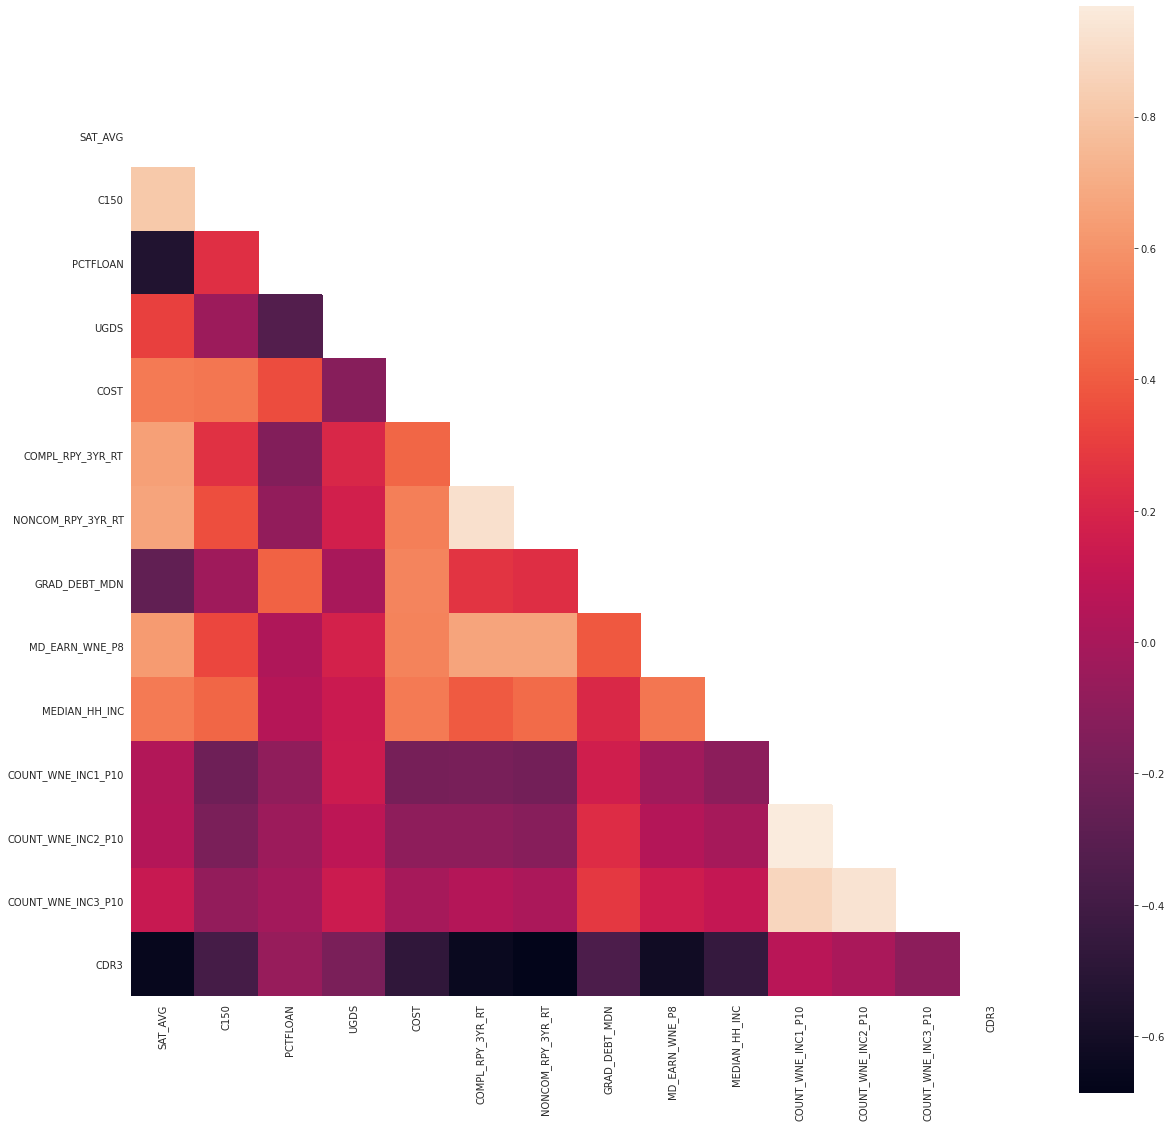

In [118]:
numeric_cols = ['SAT_AVG', 'C150', 'PCTFLOAN', 'UGDS', 'COST', 'COMPL_RPY_3YR_RT', 'NONCOM_RPY_3YR_RT',
                'GRAD_DEBT_MDN', 'MD_EARN_WNE_P8', 'MEDIAN_HH_INC',
            'COUNT_WNE_INC1_P10', 'COUNT_WNE_INC2_P10', 'COUNT_WNE_INC3_P10'] 

# Correlation matrix for continuous variables
corrMatrix = df[numeric_cols+['CDR3']].corr()
mask = np.zeros_like(corrMatrix)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 20))
    ax = sns.heatmap(corrMatrix, mask=mask,square=True) 

## Categorical variables

In [119]:
print(pd.unique(df['CONTROL'].values.ravel()))
print(pd.unique(df['ICLEVEL'].values.ravel()))
print(pd.unique(df['HIGHDEG'].values.ravel()))

[2 1 3]
[1 3 2]
[3 2 1 4 0]


In [120]:
## ONE HOT ENCODING FOR CATEGORICAL VARIABLES because some models do not work with categorical variables
#train set
if 'CONTROL' in df.columns:
    hot1df = pd.get_dummies(df.CONTROL, prefix='CONTROL', drop_first=True)
    df = pd.concat([df, hot1df], axis=1)
    df.drop(["CONTROL"], axis=1, inplace=True)
if 'ICLEVEL' in df.columns:
    hot1df = pd.get_dummies(df.ICLEVEL, prefix='ICLEVEL', drop_first=True)
    df = pd.concat([df, hot1df], axis=1)
    df.drop(["ICLEVEL"], axis=1, inplace=True)
if 'HIGHDEG' in df.columns:
    hot1df = pd.get_dummies(df.HIGHDEG, prefix='HIGHDEG', drop_first=True)
    df = pd.concat([df, hot1df], axis=1)
    df.drop(["HIGHDEG"], axis=1, inplace=True)
    
#test set
if 'CONTROL' in test.columns:
    hot1df = pd.get_dummies(test.CONTROL, prefix='CONTROL', drop_first=True)
    test = pd.concat([test, hot1df], axis=1)
    test.drop(["CONTROL"], axis=1, inplace=True)
if 'ICLEVEL' in test.columns:
    hot1df = pd.get_dummies(test.ICLEVEL, prefix='ICLEVEL', drop_first=True)
    test = pd.concat([test, hot1df], axis=1)
    test.drop(["ICLEVEL"], axis=1, inplace=True)
if 'HIGHDEG' in test.columns:
    hot1df = pd.get_dummies(test.HIGHDEG, prefix='HIGHDEG', drop_first=True)
    test = pd.concat([test, hot1df], axis=1)
    test.drop(["HIGHDEG"], axis=1, inplace=True)

In [121]:
df.head(1)

,CDR3,INSTNM,SAT_AVG,COMPL_RPY_3YR_RT,NONCOM_RPY_3YR_RT,GRAD_DEBT_MDN,PCTFLOAN,MD_EARN_WNE_P8,MEDIAN_HH_INC,COUNT_WNE_INC1_P10,COUNT_WNE_INC2_P10,COUNT_WNE_INC3_P10,UGDS,COST,C150,CONTROL_2,CONTROL_3,ICLEVEL_2,ICLEVEL_3,HIGHDEG_1,HIGHDEG_2,HIGHDEG_3,HIGHDEG_4
716,0.027,Ringling College of Art and Design,NaN,0.706989,0.553922,27000.0,0.6078,33800.0,70285.4,97.0,112.0,166.0,1559.0,64554.0,0.7152,1,0,0,0,0,0,1,0


In [122]:
test.head(1)

,CDR3,INSTNM,SAT_AVG,COMPL_RPY_3YR_RT,NONCOM_RPY_3YR_RT,GRAD_DEBT_MDN,PCTFLOAN,MD_EARN_WNE_P8,MEDIAN_HH_INC,COUNT_WNE_INC1_P10,COUNT_WNE_INC2_P10,COUNT_WNE_INC3_P10,UGDS,COST,C150,CONTROL_2,CONTROL_3,ICLEVEL_2,ICLEVEL_3,HIGHDEG_1,HIGHDEG_2,HIGHDEG_3,HIGHDEG_4
25,NaN,J F Ingram State Technical College,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,443.0,5580.0,0.5,0,0,1,0,1,0,0,0


In [123]:
#Delete duplicates (some colleges are presented more than once)
df.drop_duplicates('INSTNM', inplace=True)
df.shape

(3737, 23)

## Delete rows with more than 5 missing values

In [124]:
# I delete this feature since more than half of the rows present null values
df = df.drop('SAT_AVG', axis = 1)
test = test.drop('SAT_AVG', axis = 1)

In [125]:
# Delete rows with more than 5 missing values
df = df[df.isnull().sum(axis=1) < 5]
df.shape

(3138, 22)

In [126]:
print(df.isnull().sum())

CDR3                    0
INSTNM                  0
COMPL_RPY_3YR_RT        3
NONCOM_RPY_3YR_RT       3
GRAD_DEBT_MDN           4
PCTFLOAN               74
MD_EARN_WNE_P8          3
MEDIAN_HH_INC         269
COUNT_WNE_INC1_P10      3
COUNT_WNE_INC2_P10      3
COUNT_WNE_INC3_P10      3
UGDS                   75
COST                  193
C150                  166
CONTROL_2               0
CONTROL_3               0
ICLEVEL_2               0
ICLEVEL_3               0
HIGHDEG_1               0
HIGHDEG_2               0
HIGHDEG_3               0
HIGHDEG_4               0
dtype: int64


## Imputation of missing values

In [129]:
df.isnull().sum()

CDR3                    0
INSTNM                  0
COMPL_RPY_3YR_RT        3
NONCOM_RPY_3YR_RT       3
GRAD_DEBT_MDN           4
PCTFLOAN               74
MD_EARN_WNE_P8          3
MEDIAN_HH_INC         269
COUNT_WNE_INC1_P10      3
COUNT_WNE_INC2_P10      3
COUNT_WNE_INC3_P10      3
UGDS                   75
COST                  193
C150                  166
CONTROL_2               0
CONTROL_3               0
ICLEVEL_2               0
ICLEVEL_3               0
HIGHDEG_1               0
HIGHDEG_2               0
HIGHDEG_3               0
HIGHDEG_4               0
dtype: int64

In [130]:
df = df.drop('INSTNM', axis = 1)
test = test.drop('INSTNM', axis = 1)

We will impute missing values with Iterative Imputer: it is a strategy for imputing missing values by modeling each feature with missing values as a function of other features in a round-robin fashion. This approach involves defining a model to predict each missing feature as a function of all other features and to repeat this process of estimating feature values multiple times. The repetition allows the refined estimated values for other features to be used as input in subsequent iterations of predicting missing values. It is a regression problem where missing values are predicted. Each feature is imputed sequentially, one after the other, allowing prior imputed values to be used as part of a model in predicting subsequent features.

In [132]:
imputer = IterativeImputer()
# fit on the train only (to avoid overfitting)
imputer.fit(df)
# transform the dataset
Xtrans = pd.DataFrame(imputer.transform(df))
Xtrans.columns = df.columns
Xtrans.index = df.index

/opt/anaconda3/lib/python3.8/site-packages/sklearn/impute/_iterative.py:669: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


In [133]:
#transform also the test set
TestTrans = pd.DataFrame(imputer.transform(test))
TestTrans.columns = test.columns
TestTrans.index = test.index

In [134]:
print(Xtrans.isnull().sum())
print(TestTrans.isnull().sum())

CDR3                  0
COMPL_RPY_3YR_RT      0
NONCOM_RPY_3YR_RT     0
GRAD_DEBT_MDN         0
PCTFLOAN              0
MD_EARN_WNE_P8        0
MEDIAN_HH_INC         0
COUNT_WNE_INC1_P10    0
COUNT_WNE_INC2_P10    0
COUNT_WNE_INC3_P10    0
UGDS                  0
COST                  0
C150                  0
CONTROL_2             0
CONTROL_3             0
ICLEVEL_2             0
ICLEVEL_3             0
HIGHDEG_1             0
HIGHDEG_2             0
HIGHDEG_3             0
HIGHDEG_4             0
dtype: int64
CDR3                  0
COMPL_RPY_3YR_RT      0
NONCOM_RPY_3YR_RT     0
GRAD_DEBT_MDN         0
PCTFLOAN              0
MD_EARN_WNE_P8        0
MEDIAN_HH_INC         0
COUNT_WNE_INC1_P10    0
COUNT_WNE_INC2_P10    0
COUNT_WNE_INC3_P10    0
UGDS                  0
COST                  0
C150                  0
CONTROL_2             0
CONTROL_3             0
ICLEVEL_2             0
ICLEVEL_3             0
HIGHDEG_1             0
HIGHDEG_2             0
HIGHDEG_3             0
HIG

## Check target variable distribution

In [135]:
resp = df['CDR3']
stat, p = shapiro(resp)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian --> fail to reject H0')
else:
    print('Sample does not look Gaussian --> reject H0')

Statistics=0.955, p=0.000
Sample does not look Gaussian --> reject H0


<AxesSubplot:xlabel='CDR3', ylabel='Density'>

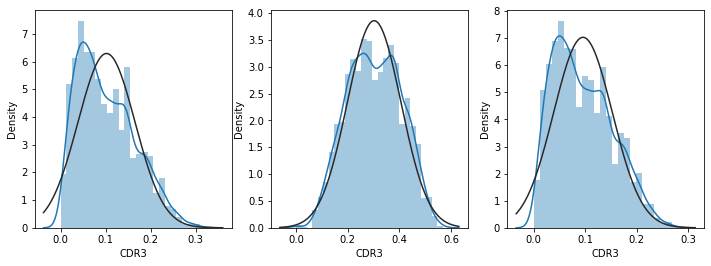

In [136]:
#Check the distribution of the target variable 
fig, ax = plt.subplots(1, 3)
width, height = fig.get_size_inches()
fig.set_size_inches(width*2, height)

sns.distplot(df['CDR3'], ax=ax[0], fit=norm)
sns.distplot(np.sqrt(df['CDR3']), ax=ax[1], fit= norm)
sns.distplot(np.log(df['CDR3']+1), ax=ax[2], fit= norm)
## With np.sqrt transformation it resembles a normal distribution

We want to check the distribution of the target variable since normality may influence the results of some of the models positively. For this reason, a function is applied to the target variable. Throughout the investigation, both the original and the transformed target variable will be used for the models in order to see which one performs better.

In [137]:
df_y = Xtrans['CDR3']
df_x = Xtrans.drop('CDR3', axis = 1)

#test_y = test['CDR3']
test_x = TestTrans.drop('CDR3', axis = 1)

I am going to make a copy of the data in order to be able to compare performance of models using both y and sqrt(y) and se which one performs better.

In [138]:
X_train = df_x.copy()
y_train = df_y.copy()
X_test = test_x.copy()

In [139]:
# sqrt transformation for target variable (compare models using both y and sqrt(y))
y_train_sqrt = y_train.copy()
y_train_sqrt = y_train_sqrt.apply(lambda x: np.sqrt(x))

## Standardization 

Application of standardization to the explanatory variables: given that the features were on different scales, as described above, it seemed like a good idea to transform these too.
I will make a copy of the data, so that later I can compare models with standardized data and raw data and see in which case they perform better.
We will standardize explanatory variables with ‘MinMaxScaler’, which scales each feature to a given range, in our case 0-1.

In [140]:
#MinMax Scaler
scaler = MinMaxScaler()
X_train_scal = df_x.copy()
X_test_scal = test_x.copy()

#fit on the train
scaler.fit(X_train_scal.iloc[:,:-8])

#transform both the train and the test
X_train_scal.iloc[:,:-8] = scaler.transform(X_train_scal.iloc[:,:-8])
X_test_scal.iloc[:,:-8] = scaler.transform(X_test_scal.iloc[:,:-8])

In [141]:
X_train_scal.head(1)

,COMPL_RPY_3YR_RT,NONCOM_RPY_3YR_RT,GRAD_DEBT_MDN,PCTFLOAN,MD_EARN_WNE_P8,MEDIAN_HH_INC,COUNT_WNE_INC1_P10,COUNT_WNE_INC2_P10,COUNT_WNE_INC3_P10,UGDS,COST,C150,CONTROL_2,CONTROL_3,ICLEVEL_2,ICLEVEL_3,HIGHDEG_1,HIGHDEG_2,HIGHDEG_3,HIGHDEG_4
716,0.669512,0.566538,0.56215,0.610793,0.165761,0.6495,0.002328,0.002105,0.029149,0.023418,0.876689,0.7152,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Divide df and df_sclaed in train + dev 

Divide further the training set: train and evaluation sets in order to train our models on the train set and then check the performance on the evaluation set.
We will create train and evaluation sets first with raw data and then with the standardized ones.

In [142]:
N = len(df_x)
train_size = int(N*0.85)
dev_size = int(N*0.15)

#train
train_x = df_x[:train_size]
train_y_sqrt = y_train_sqrt[:train_size]

#eval
dev_x = df_x[train_size: train_size+dev_size]
dev_y_sqrt = y_train_sqrt[train_size: train_size+dev_size]

print(len(train_x), len(dev_x))

2667 470


In [143]:
train_x.head(1)

,COMPL_RPY_3YR_RT,NONCOM_RPY_3YR_RT,GRAD_DEBT_MDN,PCTFLOAN,MD_EARN_WNE_P8,MEDIAN_HH_INC,COUNT_WNE_INC1_P10,COUNT_WNE_INC2_P10,COUNT_WNE_INC3_P10,UGDS,COST,C150,CONTROL_2,CONTROL_3,ICLEVEL_2,ICLEVEL_3,HIGHDEG_1,HIGHDEG_2,HIGHDEG_3,HIGHDEG_4
716,0.706989,0.553922,27000.0,0.6078,33800.0,70285.4,97.0,112.0,166.0,1559.0,64554.0,0.7152,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [144]:
print(train_x.shape)
print(dev_x.shape)

(2667, 20)
(470, 20)


In [145]:
N = len(df_x)
train_size = int(N*0.85)
dev_size = int(N*0.15)

train_x_s = X_train_scal[:train_size]
train_y = df_y[:train_size]
dev_x_s = X_train_scal[train_size: train_size+dev_size]
dev_y = df_y[train_size: train_size+dev_size]

print(len(train_x_s), len(dev_x_s))

2667 470


In [146]:
print(train_x_s.shape)
print(dev_x_s.shape)

(2667, 20)
(470, 20)


In [147]:
train_x_s.head(1)

,COMPL_RPY_3YR_RT,NONCOM_RPY_3YR_RT,GRAD_DEBT_MDN,PCTFLOAN,MD_EARN_WNE_P8,MEDIAN_HH_INC,COUNT_WNE_INC1_P10,COUNT_WNE_INC2_P10,COUNT_WNE_INC3_P10,UGDS,COST,C150,CONTROL_2,CONTROL_3,ICLEVEL_2,ICLEVEL_3,HIGHDEG_1,HIGHDEG_2,HIGHDEG_3,HIGHDEG_4
716,0.669512,0.566538,0.56215,0.610793,0.165761,0.6495,0.002328,0.002105,0.029149,0.023418,0.876689,0.7152,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Models

Having concluded the preprocessing of the data, the main part of the analysis starts here. This involved the application of different models, using all the various combinations of transformations of the input data and the target variable in each case, and the optimization of these models.
The optimization of the parameters will be carried out using GridSearchCV. This approach tests all possible combinations exhaustively using cross-validation, but this means that it requires a huge amount of computations. Because of this, especially given the number of potential parameters of the function, only a subset will be tested.

## Random forest 

1. Raw data and y

In [164]:
rf = RandomForestRegressor(random_state = 1, n_jobs = -1, criterion = "mae")
score = cross_val_score(rf, train_x, train_y, cv=3, scoring="neg_mean_absolute_error", n_jobs = -1)
rf.fit(train_x, train_y)
print("neg MAE score:", score)

neg MAE score: [-0.02320935 -0.02181358 -0.02066343]


In [165]:
predictions = rf.predict(dev_x)
# Calculate the absolute errors
errors = (abs(predictions - dev_y))
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mean_absolute_error(dev_y, predictions)

Mean Absolute Error: 0.02 degrees.


0.02112975531914894

2. Raw data and sqrt(y)

In [167]:
rf = RandomForestRegressor(random_state = 1, n_jobs = -1, criterion = "mae")
score = cross_val_score(rf, train_x, train_y_sqrt, cv=3, scoring="neg_mean_absolute_error", n_jobs = -1)
rf.fit(train_x, train_y_sqrt)
print("neg MAE score:", score)

neg MAE score: [-0.03702803 -0.03468015 -0.03336864]


In [168]:
predictions = rf.predict(dev_x)
# Calculate the absolute errors
errors = (abs(predictions - dev_y_sqrt))
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mean_absolute_error(dev_y_sqrt, predictions)

Mean Absolute Error: 0.03 degrees.


0.03443549829108089

3. Standardized data and y

In [169]:
rf = RandomForestRegressor(random_state = 1, n_jobs = -1, criterion = "mae")
score = cross_val_score(rf, train_x_s, train_y, cv=3, scoring="neg_mean_absolute_error", n_jobs = -1)
rf.fit(train_x_s, train_y)
print("neg MAE score:", score)

neg MAE score: [-0.02319457 -0.02182154 -0.0206523 ]


In [170]:
predictions = rf.predict(dev_x_s)
# Calculate the absolute errors
errors = (abs(predictions - dev_y))
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mean_absolute_error(dev_y, predictions)

Mean Absolute Error: 0.02 degrees.


0.0211033829787234

4. Standardized data and sqrt(y)

In [171]:
rf = RandomForestRegressor(random_state = 1, n_jobs = -1, criterion = "mae")
score = cross_val_score(rf, train_x_s, train_y_sqrt, cv=3, scoring="neg_mean_absolute_error", n_jobs = -1)
rf.fit(train_x_s, train_y_sqrt)
print("neg MAE score:", score)

neg MAE score: [-0.03700976 -0.03470364 -0.03337713]


In [172]:
predictions = rf.predict(dev_x_s)
# Calculate the absolute errors
errors = (abs(predictions - dev_y_sqrt))
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mean_absolute_error(dev_y_sqrt, predictions)

Mean Absolute Error: 0.03 degrees.


0.03445265816168211

Optimization of Random Forest that had the best performance: 

In [161]:
rf = RandomForestRegressor(random_state = 1, n_jobs = -1, criterion = "mae")

min_samples_leaf_n = [1, 10, 20]
max_features_n = ['auto', 'sqrt']
n_estimators_n = [1000, 5000]

param_grid = [
    {'min_samples_leaf': min_samples_leaf_n,
     'max_features': max_features_n,
     'n_estimators': n_estimators_n,
    },
    ]

grid = GridSearchCV(rf, param_grid, cv = 3, scoring='neg_mean_absolute_error', n_jobs = -1)
grid.fit(train_x_s, train_y.values.ravel())

print(grid.best_params_)
print(grid.best_score_)

{'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 5000}
-0.02173784334458169


RandomForest with the optimal parameters found with GridSearchCV

In [207]:
rf_opt = RandomForestRegressor(random_state = 1, n_jobs = -1, max_features = 'auto', criterion = "mae", 
                               min_samples_leaf = 1, n_estimators = 5000)

score = cross_val_score(rf_opt, train_x_s, train_y, cv=3, scoring="neg_mean_absolute_error", n_jobs = -1)
rf_opt.fit(train_x_s, train_y)
print("MAE score:", score)

MAE score: [-0.02287673 -0.02181082 -0.02052599]


In [208]:
predictions = rf_opt.predict(dev_x_s)
# Calculate the absolute errors
errors = (abs(predictions - dev_y))
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mean_absolute_error(dev_y, predictions)

Mean Absolute Error: 0.02 degrees.


0.021012177446808295

In [209]:
prediction_test = rf_opt.predict(X_test)

In [211]:
p = pd.DataFrame(prediction_test)

In [212]:
p.to_csv('prediction_for_test_set.csv')

## Logistic regression

1. Raw data (not scaled) and y (not under sqrt)

In [173]:
logit = sm.Logit(train_y, train_x)
logitFit = logit.fit()
print(logitFit.summary())

Optimization terminated successfully.
         Current function value: 0.169185
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                   CDR3   No. Observations:                 2667
Model:                          Logit   Df Residuals:                     2647
Method:                           MLE   Df Model:                           19
Date:                Tue, 08 Dec 2020   Pseudo R-squ.:                     inf
Time:                        00:02:09   Log-Likelihood:                -451.22
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
COMPL_RPY_3YR_RT      -0.0143      1.013     -0.014      0.989      -1.999       1.970
NONCO

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:3489: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


In [174]:
predictions = logitFit.predict(dev_x)
errors = abs(predictions - dev_y)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mean_absolute_error(dev_y, predictions)

Mean Absolute Error: 0.03 degrees.


0.027640552545499467

2. Raw data (not scaled) and sqrt(y) 

In [175]:
logit = sm.Logit(train_y_sqrt, train_x)
logitFit = logit.fit()
print(logitFit.summary())

Optimization terminated successfully.
         Current function value: 0.520216
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                   CDR3   No. Observations:                 2667
Model:                          Logit   Df Residuals:                     2647
Method:                           MLE   Df Model:                           19
Date:                Tue, 08 Dec 2020   Pseudo R-squ.:                  -11.87
Time:                        00:02:18   Log-Likelihood:                -1387.4
converged:                       True   LL-Null:                       -107.84
Covariance Type:            nonrobust   LLR p-value:                     1.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
COMPL_RPY_3YR_RT       0.2925      0.673      0.435      0.664      -1.026       1.611
NONCO

In [176]:
predictions = logitFit.predict(dev_x)
errors = abs(predictions - dev_y_sqrt)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mean_absolute_error(dev_y_sqrt, predictions)

Mean Absolute Error: 0.04 degrees.


0.04271810493405506

3. Standardized data and y

In [177]:
logit = sm.Logit(train_y, train_x_s)
logitFit = logit.fit()
print(logitFit.summary())

Optimization terminated successfully.
         Current function value: 0.169674
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                   CDR3   No. Observations:                 2667
Model:                          Logit   Df Residuals:                     2647
Method:                           MLE   Df Model:                           19
Date:                Tue, 08 Dec 2020   Pseudo R-squ.:                     inf
Time:                        00:02:27   Log-Likelihood:                -452.52
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
COMPL_RPY_3YR_RT      -0.1402      0.811     -0.173      0.863      -1.730       1.450
NONCO

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:3489: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


In [178]:
predictions = logitFit.predict(dev_x_s)
errors = abs(predictions - dev_y)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mean_absolute_error(dev_y, predictions)

Mean Absolute Error: 0.03 degrees.


0.028631990083314244

4. Standardized data and sqrt(y)

In [179]:
logit = sm.Logit(train_y_sqrt, train_x_s)
logitFit = logit.fit()
print(logitFit.summary())

Optimization terminated successfully.
         Current function value: 0.520206
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                   CDR3   No. Observations:                 2667
Model:                          Logit   Df Residuals:                     2647
Method:                           MLE   Df Model:                           19
Date:                Tue, 08 Dec 2020   Pseudo R-squ.:                  -11.86
Time:                        00:03:03   Log-Likelihood:                -1387.4
converged:                       True   LL-Null:                       -107.84
Covariance Type:            nonrobust   LLR p-value:                     1.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
COMPL_RPY_3YR_RT       0.1464      0.544      0.269      0.788      -0.921       1.213
NONCO

In [180]:
predictions = logitFit.predict(dev_x_s)
errors = abs(predictions - dev_y_sqrt)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mean_absolute_error(dev_y_sqrt, predictions)

Mean Absolute Error: 0.04 degrees.


0.04275785386503357

## Boosting 

1. Raw data and y

In [181]:
regr_boost = GradientBoostingRegressor(n_estimators=5000, learning_rate=0.01, random_state=1)
regr_boost.fit(train_x, train_y)

GradientBoostingRegressor(learning_rate=0.01, n_estimators=5000, random_state=1)

In [182]:
y_pred = regr_boost.predict(dev_x)
mean_absolute_error(dev_y, y_pred)

0.02196405861056608

2. Raw data and sqrt(y)

In [183]:
regr_boost = GradientBoostingRegressor(n_estimators=5000, learning_rate=0.01, random_state=1)
regr_boost.fit(train_x, train_y_sqrt)

GradientBoostingRegressor(learning_rate=0.01, n_estimators=5000, random_state=1)

In [184]:
y_pred = regr_boost.predict(dev_x)
mean_absolute_error(dev_y_sqrt, y_pred)

0.035944280287903904

3. Standardized data and y

In [185]:
regr_boost = GradientBoostingRegressor(n_estimators=5000, learning_rate=0.01, random_state=1)
regr_boost.fit(train_x_s, train_y)

GradientBoostingRegressor(learning_rate=0.01, n_estimators=5000, random_state=1)

In [186]:
y_pred = regr_boost.predict(dev_x_s)
mean_absolute_error(dev_y, y_pred)

0.021925214526719555

4. Standardized data and sqrt(y)

In [188]:
regr_boost = GradientBoostingRegressor(n_estimators=5000, learning_rate=0.01, random_state=1)
regr_boost.fit(train_x_s, train_y_sqrt)

GradientBoostingRegressor(learning_rate=0.01, n_estimators=5000, random_state=1)

In [189]:
y_pred = regr_boost.predict(dev_x_s)
mean_absolute_error(dev_y_sqrt, y_pred)

0.035964432955087805

## Support Vector Machine

1. Raw data and y

In [190]:
svm = SVR()

score = cross_val_score(svm, train_x, train_y, cv=3, scoring="neg_mean_absolute_error", n_jobs = -1)
print("MAE score:", score)

MAE score: [-0.04340454 -0.04283741 -0.04735329]


2. Raw data and sqrt(y)

In [191]:
svm = SVR()

score = cross_val_score(svm, train_x, train_y_sqrt, cv=3, scoring="neg_mean_absolute_error", n_jobs = -1)
print("MAE score:", score)

MAE score: [-0.05493583 -0.05286576 -0.05388723]


3. Standardized data and y

In [192]:
svm = SVR()

score = cross_val_score(svm, train_x_s, train_y, cv=3, scoring="neg_mean_absolute_error", n_jobs = -1)
print("MAE score:", score)

MAE score: [-0.04385779 -0.04740536 -0.04411674]


4. Standardized data and sqrt(y)

In [193]:
svm = SVR()

score = cross_val_score(svm, train_x_s, train_y_sqrt, cv=3, scoring="neg_mean_absolute_error", n_jobs = -1)
print("MAE score:", score)

MAE score: [-0.04692697 -0.04842867 -0.04557003]


In [200]:
svm = SVR()

kernel_n = ['poly', 'rbf', 'sigmoid']
C_n = [0.1, 1.0, 10.0, 100.0, 1000.0]
shrinking_n = [True, False]

param_grid = [
    {'kernel': kernel_n,
     'C': C_n,
     'shrinking': shrinking_n
    },
    ]

grid = GridSearchCV(svm, param_grid, cv = 3, scoring='neg_mean_absolute_error', n_jobs = -1)
grid.fit(train_x_s, train_y_sqrt.values.ravel())

print(grid.best_params_)
print(grid.best_score_)

{'C': 0.1, 'kernel': 'rbf', 'shrinking': True}
-0.0466827078165048


In [204]:
svm_opt = SVR(C = 1.0, kernel = "rbf", shrinking = True)

score = cross_val_score(svm_opt, train_x_s, train_y_sqrt, cv=3, scoring="neg_mean_absolute_error", n_jobs = -1)
print("MAE score:", score)

MAE score: [-0.04692697 -0.04842867 -0.04557003]


## K-Nearest Neighbors

1. Raw data and y

In [196]:
knn = KNeighborsRegressor(n_jobs=-1, algorithm='auto')

score = cross_val_score(knn, train_x, train_y, cv=3, scoring="neg_mean_absolute_error")
print("MAE score:", score)

MAE score: [-0.03060517 -0.03053431 -0.0288153 ]


2. Raw data and sqrt(y)

In [197]:
knn = KNeighborsRegressor(n_jobs=-1, algorithm='auto')

score = cross_val_score(knn, train_x, train_y_sqrt, cv=3, scoring="neg_mean_absolute_error")
print("MAE score:", score)

MAE score: [-0.04886707 -0.04834251 -0.04695213]


3. Standardized data and y

In [198]:
knn = KNeighborsRegressor(n_jobs=-1, algorithm='auto')

score = cross_val_score(knn, train_x_s, train_y, cv=3, scoring="neg_mean_absolute_error")
print("MAE score:", score)

MAE score: [-0.02630574 -0.02619865 -0.02524229]


4. Standardized data and sqrt(y)

In [199]:
knn = KNeighborsRegressor(n_jobs=-1, algorithm='auto')

score = cross_val_score(knn, train_x_s, train_y_sqrt, cv=3, scoring="neg_mean_absolute_error")
print("MAE score:", score)

MAE score: [-0.04203573 -0.04135772 -0.04032619]


In [202]:
knn = KNeighborsRegressor(n_jobs=-1, algorithm='auto')

n_neighbors_n = [5, 10, 20, 30, 40]
weights_n = ["uniform", "distance"]
p_n = [1, 2]

param_grid = [
    {'n_neighbors': n_neighbors_n,
     'weights': weights_n,
     'p': p_n,
    },
    ]

grid = GridSearchCV(knn, param_grid, cv = 3, scoring='neg_mean_absolute_error')
grid.fit(train_x_s, train_y.values.ravel())

print(grid.best_params_)
print(grid.best_score_)

{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
-0.024198536827180733


In [203]:
knn_opt = KNeighborsRegressor(n_jobs=-1, algorithm='auto', n_neighbors = 5, p = 1, weights="distance")

score = cross_val_score(knn_opt, train_x_s, train_y, cv=3, scoring="neg_mean_absolute_error", n_jobs = -1)
print("MAE score:", score)

MAE score: [-0.0250409  -0.02429828 -0.02325644]


Among the various combinations and the different models that we tried, we achieved the best performance with Random Forest, using standardized features and raw y. 